#  WQI prediction using Machine learning
## Nafyad Kawo

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
color = sns.color_palette()
import scipy.stats             as stats


## Importing the dataset

In [2]:
dataset = pd.read_csv('WQI_reg.csv')


In [3]:
dataset

,x,y,PH,EC,TDS,Ca,Mg,Na,K,Cl,...,So4,No3,F,Po4,TH,SAR,Na_,RSC,PI,WQI
0,506734,941867,8.21,786,468,3.20,0.48,164.0,13.6,23.66,...,23.63,0.29,3.69,0.16,9.96560,22.606942,97.407018,6.559416,36.424478,99
1,508552,943199,7.63,739,468,12.16,2.74,164.0,11.1,35.49,...,57.22,0.40,2.07,0.43,41.63862,11.059625,89.913017,5.094612,31.455988,82
2,506187,943199,7.85,685,480,20.16,2.30,140.0,11.0,12.30,...,114.14,9.87,1.32,0.43,59.80402,7.877987,84.204195,4.163692,32.611735,77
3,503018,959480,7.38,706,432,60.80,22.34,60.0,12.5,19.11,...,6.70,3.89,0.74,0.46,243.74670,1.672320,37.553357,2.122988,35.698606,74
4,502454,962792,6.95,633,370,57.00,18.70,49.0,10.7,14.56,...,11.04,16.19,0.69,0.51,219.27950,1.439913,35.433399,1.916115,38.854888,70
5,505116,969081,7.01,684,428,55.48,16.87,70.0,21.0,15.47,...,13.30,4.35,0.71,0.22,207.95361,2.112298,46.289757,2.772366,36.975378,74
6,501572,968045,7.17,580,374,49.40,20.06,43.0,8.8,10.41,...,5.92,5.52,0.72,0.15,205.89870,1.304000,33.740353,1.763570,40.819341,64
7,506490,957774,7.24,721,454,64.00,24.48,52.0,15.0,22.71,...,0.00,6.20,0.63,0.21,260.54320,1.401846,33.688936,1.251319,34.327147,72
8,508185,965261,7.16,965,640,64.80,13.92,116.0,35.0,20.93,...,40.77,1.05,0.94,0.79,219.08640,3.410324,57.569971,5.099430,33.201456,100
9,506615,961264,7.26,662,390,53.60,24.96,56.0,11.8,12.74,...,14.21,11.09,0.71,0.24,236.54960,1.584384,36.671332,1.910756,36.306027,72


In [4]:
dataset.columns

Index(['x', 'y', 'PH', 'EC', 'TDS', 'Ca', 'Mg', 'Na', 'K', 'Cl', 'HCo3', 'So4',
       'No3', 'F', 'Po4', 'TH', 'SAR', 'Na_', 'RSC', 'PI', 'WQI'],
      dtype='object')

In [5]:
# drop location and irrigation indices
dataset= dataset.drop(['x', 'y','TH', 'SAR', 'Na_', 'RSC', 'PI'],axis=1 )

In [6]:
dataset

,PH,EC,TDS,Ca,Mg,Na,K,Cl,HCo3,So4,No3,F,Po4,WQI
0,8.21,786,468,3.20,0.48,164.0,13.6,23.66,412.36,23.63,0.29,3.69,0.16,99
1,7.63,739,468,12.16,2.74,164.0,11.1,35.49,361.61,57.22,0.40,2.07,0.43,82
2,7.85,685,480,20.16,2.30,140.0,11.0,12.30,326.96,114.14,9.87,1.32,0.43,77
3,7.38,706,432,60.80,22.34,60.0,12.5,19.11,426.76,6.70,3.89,0.74,0.46,74
4,6.95,633,370,57.00,18.70,49.0,10.7,14.56,384.30,11.04,16.19,0.69,0.51,70
5,7.01,684,428,55.48,16.87,70.0,21.0,15.47,422.73,13.30,4.35,0.71,0.22,74
6,7.17,580,374,49.40,20.06,43.0,8.8,10.41,358.68,5.92,5.52,0.72,0.15,64
7,7.24,721,454,64.00,24.48,52.0,15.0,22.71,394.06,0.00,6.20,0.63,0.21,72
8,7.16,965,640,64.80,13.92,116.0,35.0,20.93,578.28,40.77,1.05,0.94,0.79,100
9,7.26,662,390,53.60,24.96,56.0,11.8,12.74,405.04,14.21,11.09,0.71,0.24,72


In [7]:
# Split into features and target 
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [8]:
X1 = dataset.iloc[:, :-1]
#y2 = dataset.iloc[:, -1]

In [9]:
X1.columns


Index(['PH', 'EC', 'TDS', 'Ca', 'Mg', 'Na', 'K', 'Cl', 'HCo3', 'So4', 'No3',
       'F', 'Po4'],
      dtype='object')

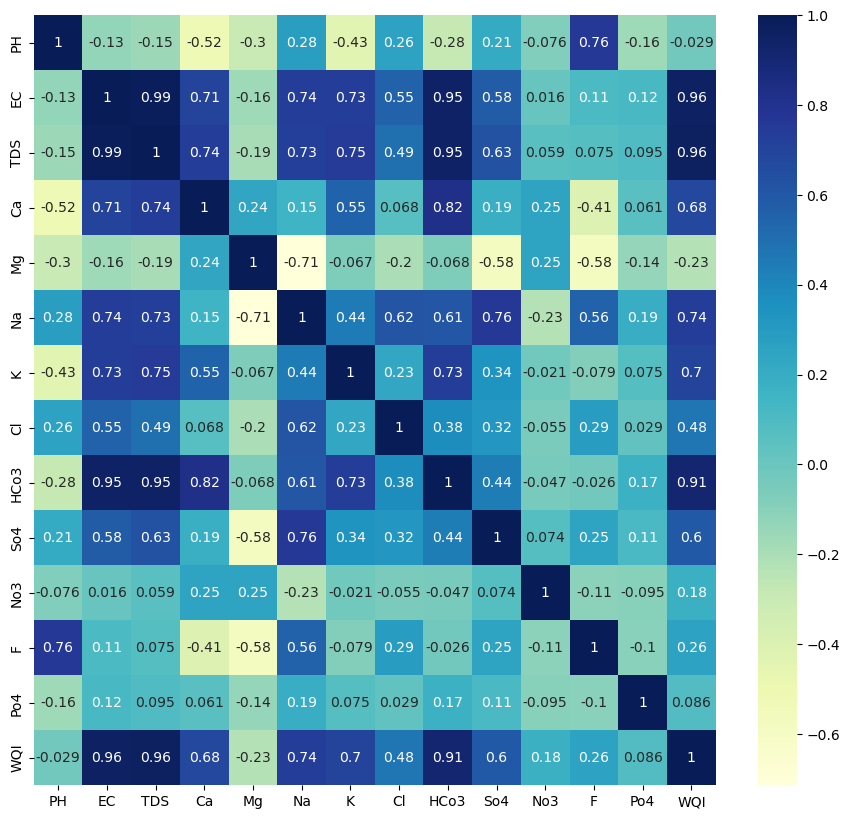

In [10]:
Cor = dataset.corr()
plt.subplots(figsize=(11,10))
sns.heatmap(Cor, cmap="YlGnBu",  annot=True)
plt.show()

In [11]:
# correlation for the attribute "WQI" ( highest correlation- EC, TDS HCO3, Na, K, Ca) 
Cor["WQI"].sort_values()


Mg     -0.226320
PH     -0.029444
Po4     0.085971
No3     0.180026
F       0.261804
Cl      0.476738
So4     0.595804
Ca      0.684665
K       0.699922
Na      0.738636
HCo3    0.912998
EC      0.958754
TDS     0.960008
WQI     1.000000
Name: WQI, dtype: float64

In [12]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
PH,21.0,7.184286,0.378201,6.47,7.00,7.16,7.26,8.21
EC,21.0,727.666667,241.135508,366.00,623.00,685.00,739.00,1528.00
TDS,21.0,462.476190,166.405414,240.00,374.00,432.00,476.00,1030.00
Ca,21.0,51.291429,35.032801,3.20,23.56,53.60,64.00,174.80
Mg,21.0,14.349524,7.931645,0.48,7.75,16.87,20.06,24.96
Na,21.0,88.976190,49.463743,40.00,49.00,70.00,118.00,208.00
K,21.0,16.038095,8.829919,4.10,11.00,12.50,19.50,35.00
Cl,21.0,19.161905,8.493634,7.54,12.30,17.29,22.71,35.49
HCo3,21.0,423.075714,160.380309,224.48,351.60,394.06,422.73,1000.40
So4,21.0,25.804286,29.809905,0.00,5.92,14.21,35.32,114.14


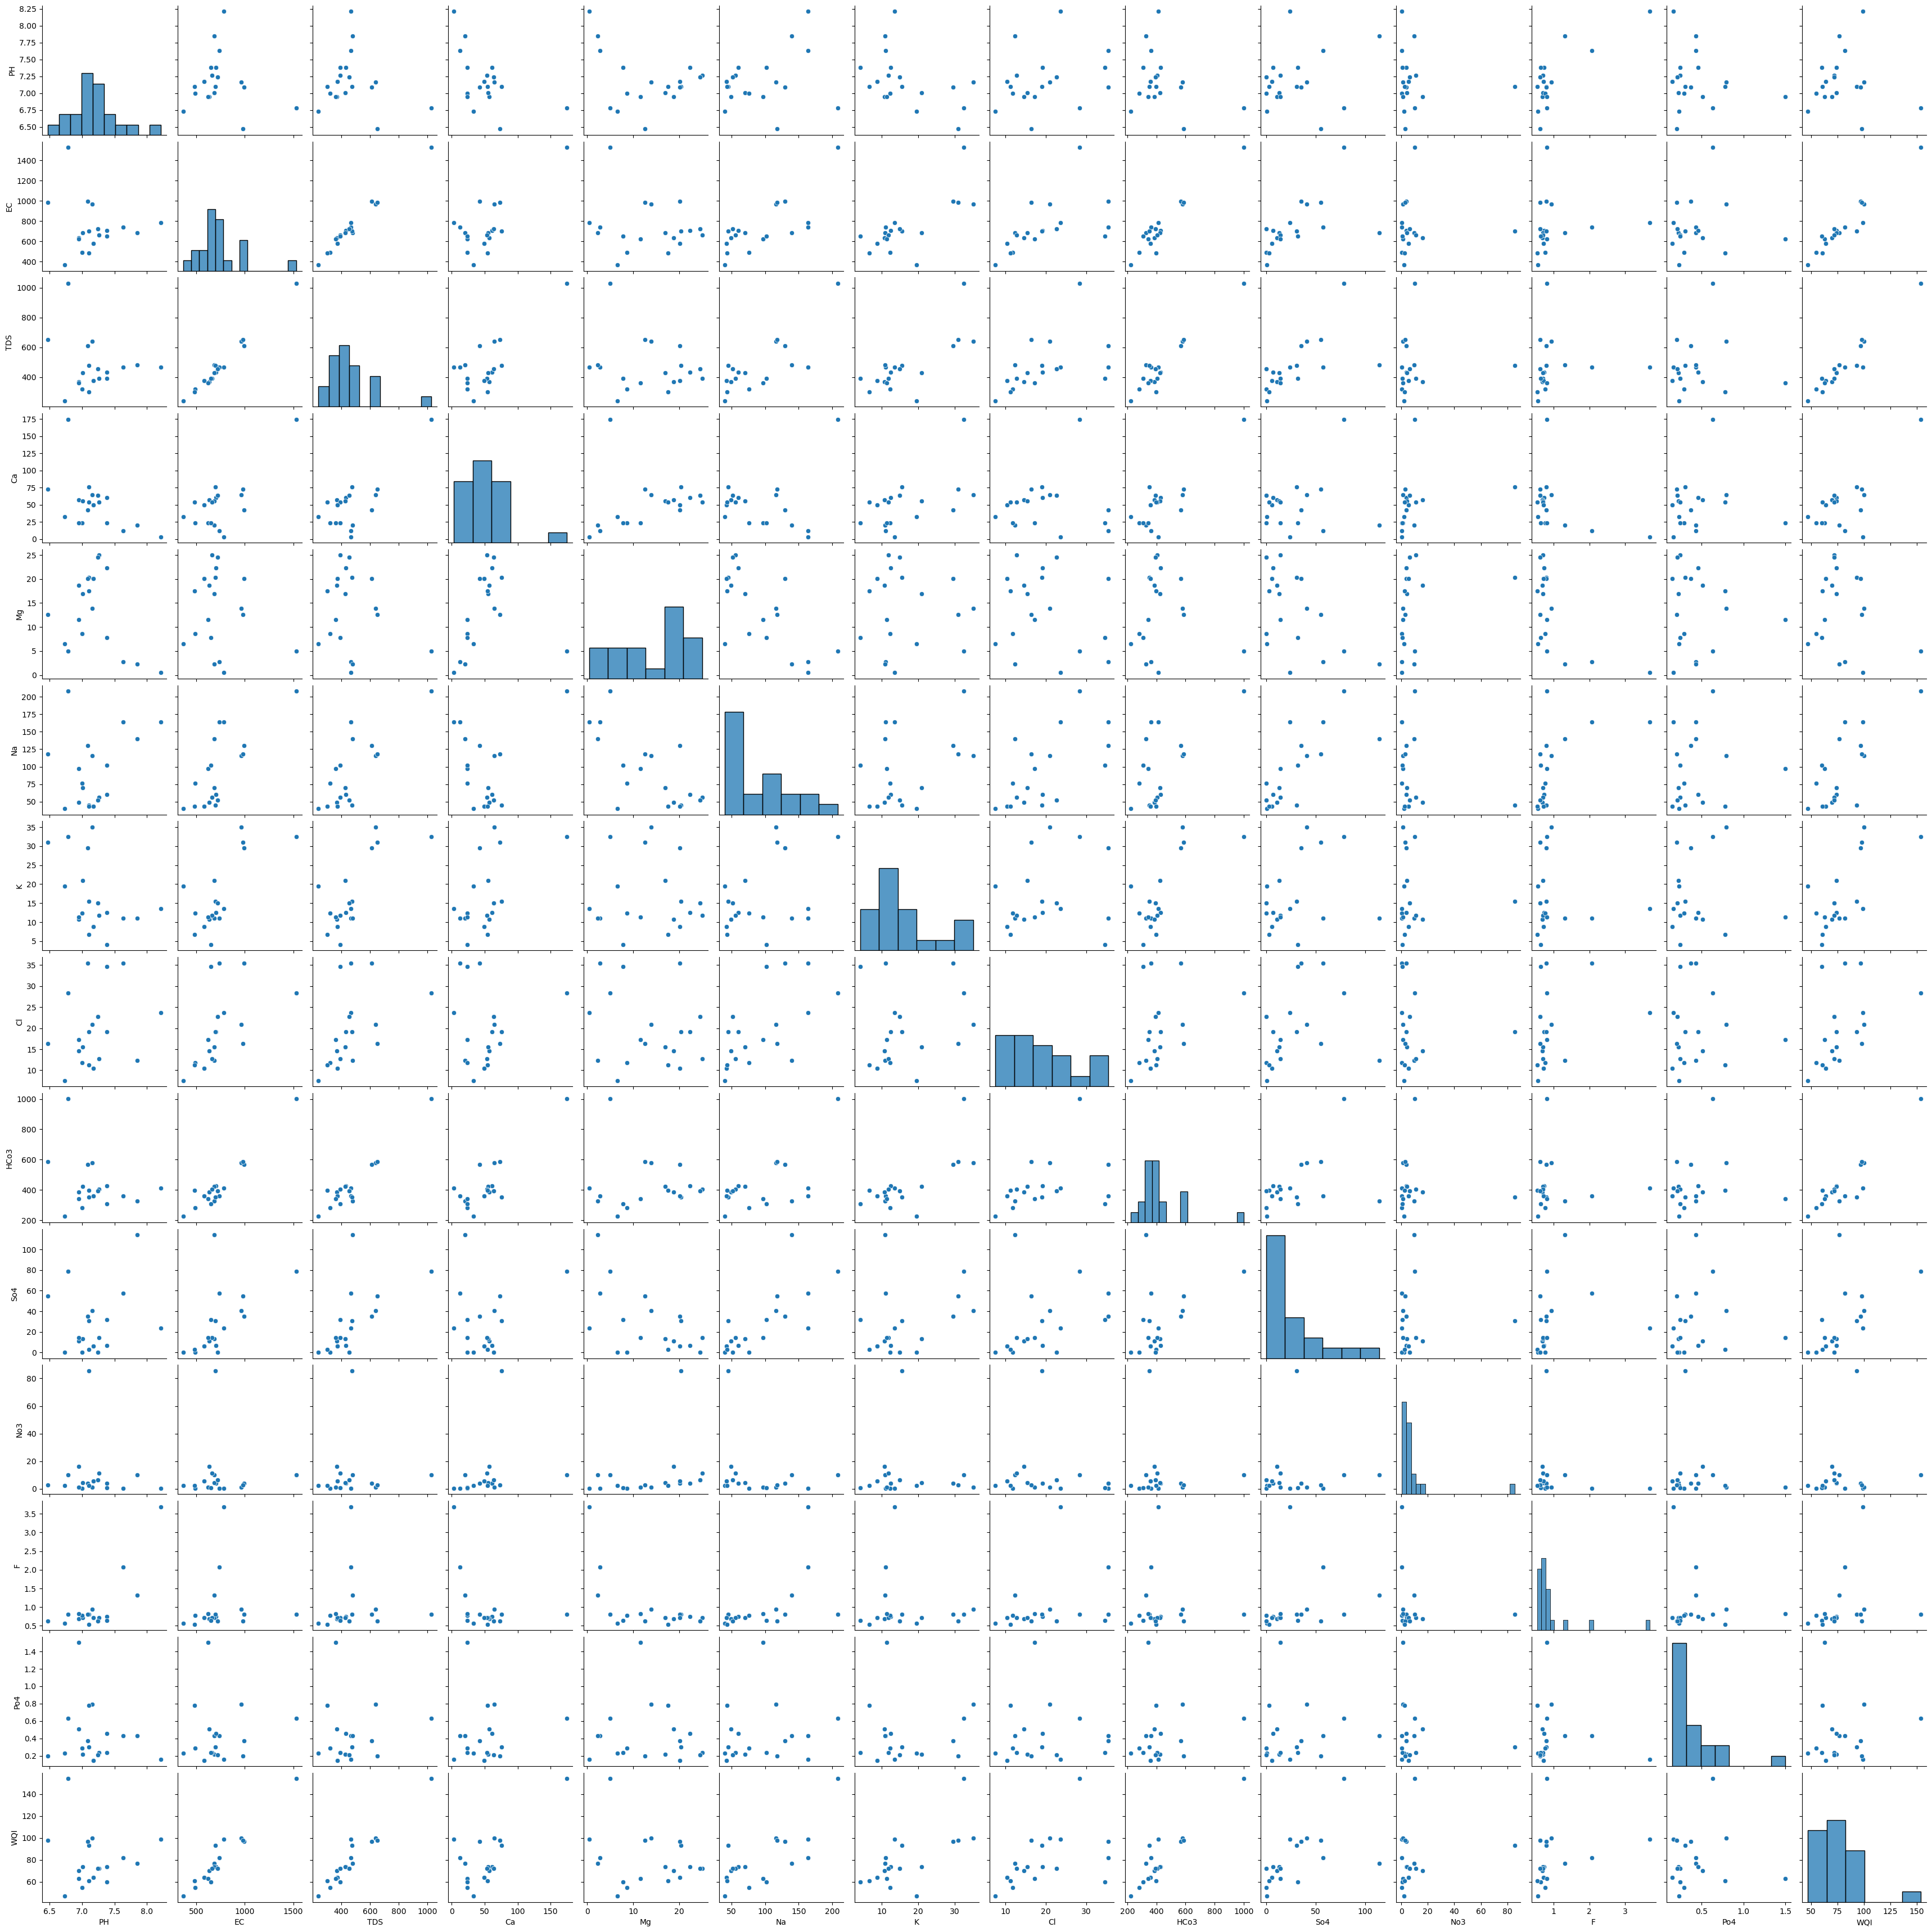

In [13]:
ax = sns.pairplot(dataset)

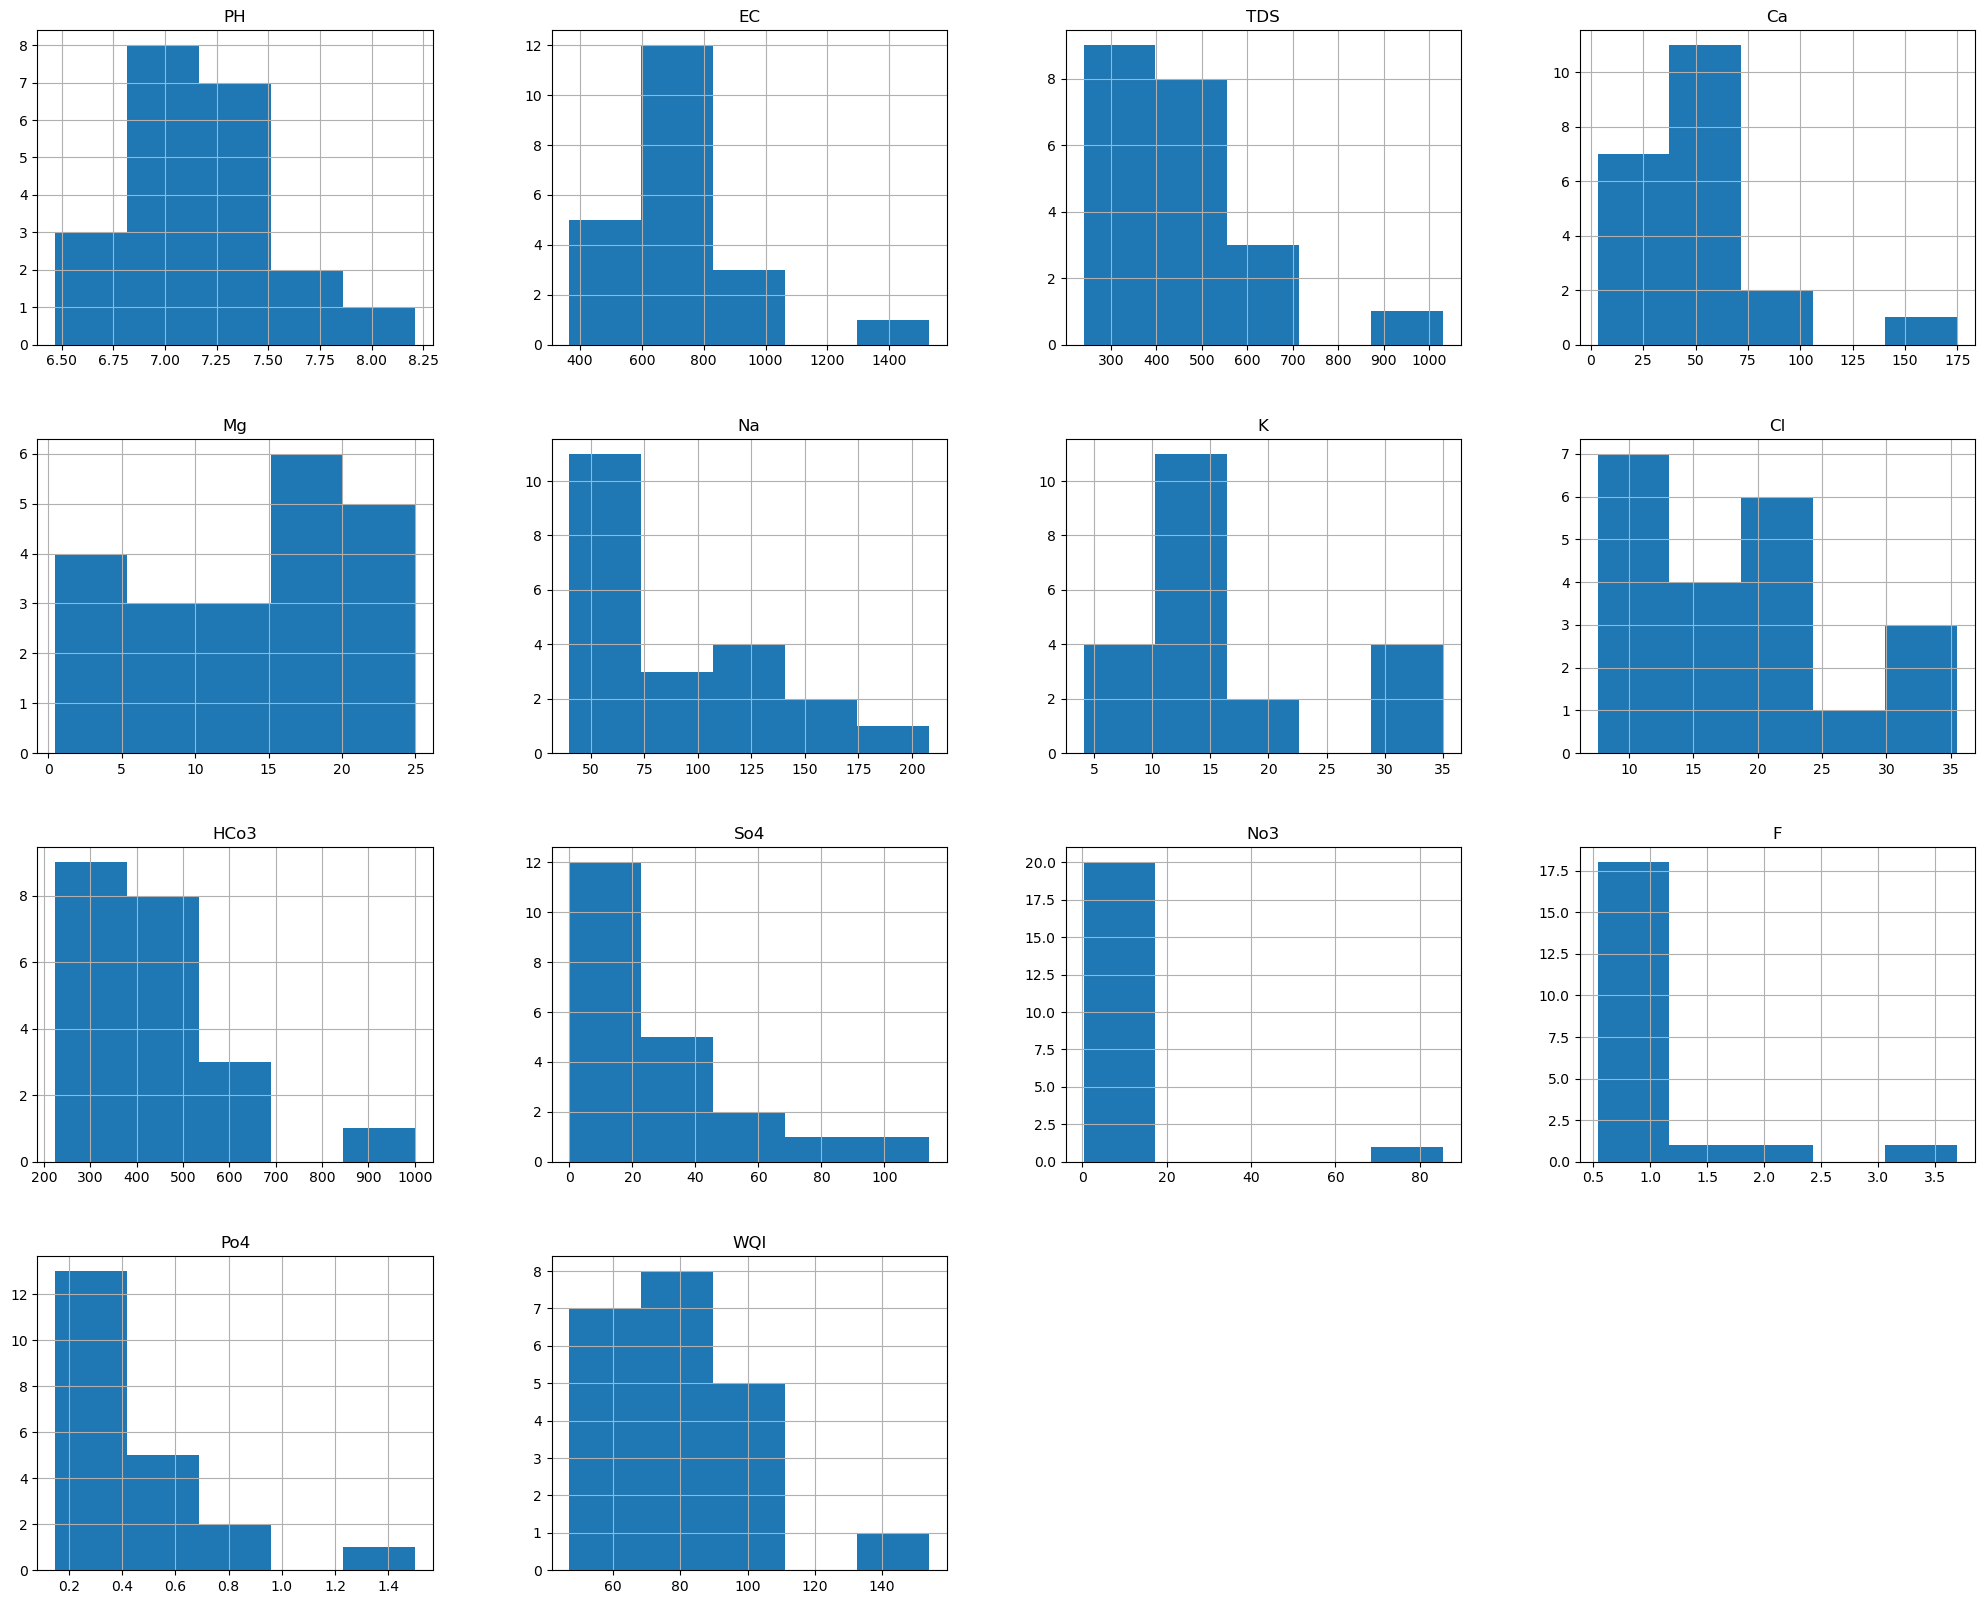

In [14]:
dataset.hist(bins=5, figsize=(25, 20))
plt.show()

## Splitting the dataset into the Training set and Test set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [16]:
X_train.shape,y_train.shape, y_test.shape, X_test.shape

((14, 13), (14,), (7,), (7, 13))

### Data Scaling 

In [17]:
#standardization transform attributes with mean 0 and standard deviation 1.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
def evaluate_preds(y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    MSLE = mean_squared_log_error(y_test, y_pred)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, y_pred))
    MAE = mean_absolute_error(y_test, y_pred)
    metric_dict = {"r2": round(r2, 2),
                   "MSE": round(MSE, 2),
                   "RMSE": round(RMSE, 2),
                   "MSLE": round(MSLE, 2),
                   "RMSLE": round(RMSLE, 2),
                   "MAE": round(MAE, 2)}
    print(f"r2: {r2:.2f}")
    print(f"MSE: {MSE:.2f}")
    print(f"RMSE: {RMSE:.2f}")
    print(f"MSLE: {MSLE:.2f}")
    print(f"RMSLE: {RMSLE:.2f}")
    print(f"MAE: {MAE:.2f}")
    return metric_dict

## Multiple Linear Regression 

In [19]:
from sklearn.linear_model import LinearRegression
LinearR = LinearRegression()
LinearR .fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred = LinearR .predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 99.95 100.  ]
 [ 46.12  47.  ]
 [ 72.    72.  ]
 [ 81.21  82.  ]
 [ 96.46  97.  ]
 [ 89.62  93.  ]
 [ 53.71  55.  ]]


In [21]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error,r2_score

In [22]:
# Evaluate the LinearR on testdata set
MultipleLinearR_metrics = evaluate_preds(y_test, y_pred)

r2: 0.99
MSE: 2.11
RMSE: 1.45
MSLE: 0.00
RMSLE: 0.02
MAE: 0.99


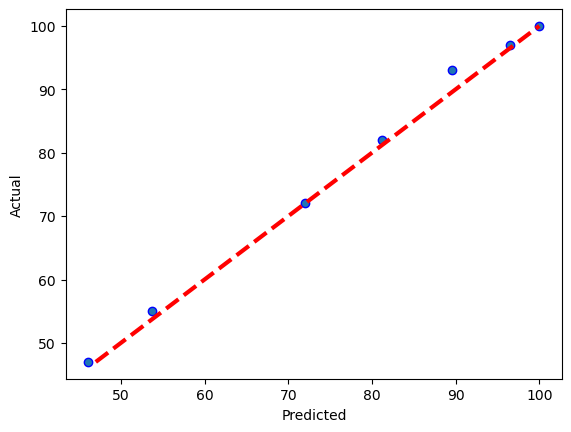

In [23]:
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

### DecisionTreeRegressor

In [24]:
from sklearn.tree import DecisionTreeRegressor
DTregressor = DecisionTreeRegressor(random_state = 0)
DTregressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [25]:
y_pred = DTregressor.predict(X_test)

In [26]:
DT_metrics = evaluate_preds(y_test, y_pred)

r2: 0.71
MSE: 106.86
RMSE: 10.34
MSLE: 0.02
RMSLE: 0.15
MAE: 7.43


In [27]:
from sklearn import tree

In [28]:
from sklearn import tree
text_representation = tree.export_text(DTregressor)
print(text_representation)

|--- feature_8 <= 2.11
|   |--- feature_1 <= 0.07
|   |   |--- feature_1 <= -0.33
|   |   |   |--- feature_10 <= 1.16
|   |   |   |   |--- feature_11 <= -0.35
|   |   |   |   |   |--- feature_1 <= -0.68
|   |   |   |   |   |   |--- value: [61.00]
|   |   |   |   |   |--- feature_1 >  -0.68
|   |   |   |   |   |   |--- value: [60.00]
|   |   |   |   |--- feature_11 >  -0.35
|   |   |   |   |   |--- feature_7 <= -0.57
|   |   |   |   |   |   |--- value: [64.00]
|   |   |   |   |   |--- feature_7 >  -0.57
|   |   |   |   |   |   |--- value: [63.00]
|   |   |   |--- feature_10 >  1.16
|   |   |   |   |--- value: [70.00]
|   |   |--- feature_1 >  -0.33
|   |   |   |--- feature_5 <= 0.32
|   |   |   |   |--- feature_10 <= -0.10
|   |   |   |   |   |--- value: [74.00]
|   |   |   |   |--- feature_10 >  -0.10
|   |   |   |   |   |--- value: [72.00]
|   |   |   |--- feature_5 >  0.32
|   |   |   |   |--- value: [77.00]
|   |--- feature_1 >  0.07
|   |   |--- feature_1 <= 0.61
|   |   |   |--- v

[Text(0.75, 0.9285714285714286, 'X[8] <= 2.11\nsquared_error = 572.061\nsamples = 14\nvalue = 78.714'),
 Text(0.6833333333333333, 0.7857142857142857, 'X[1] <= 0.07\nsquared_error = 146.533\nsamples = 13\nvalue = 72.923'),
 Text(0.5, 0.6428571428571429, 'X[1] <= -0.325\nsquared_error = 32.562\nsamples = 11\nvalue = 68.273'),
 Text(0.3333333333333333, 0.5, 'X[10] <= 1.161\nsquared_error = 10.222\nsamples = 6\nvalue = 63.667'),
 Text(0.26666666666666666, 0.35714285714285715, 'X[11] <= -0.353\nsquared_error = 2.64\nsamples = 5\nvalue = 62.4'),
 Text(0.13333333333333333, 0.21428571428571427, 'X[1] <= -0.683\nsquared_error = 0.25\nsamples = 2\nvalue = 60.5'),
 Text(0.06666666666666667, 0.07142857142857142, 'squared_error = 0.0\nsamples = 1\nvalue = 61.0'),
 Text(0.2, 0.07142857142857142, 'squared_error = 0.0\nsamples = 1\nvalue = 60.0'),
 Text(0.4, 0.21428571428571427, 'X[7] <= -0.568\nsquared_error = 0.222\nsamples = 3\nvalue = 63.667'),
 Text(0.3333333333333333, 0.07142857142857142, 'squar

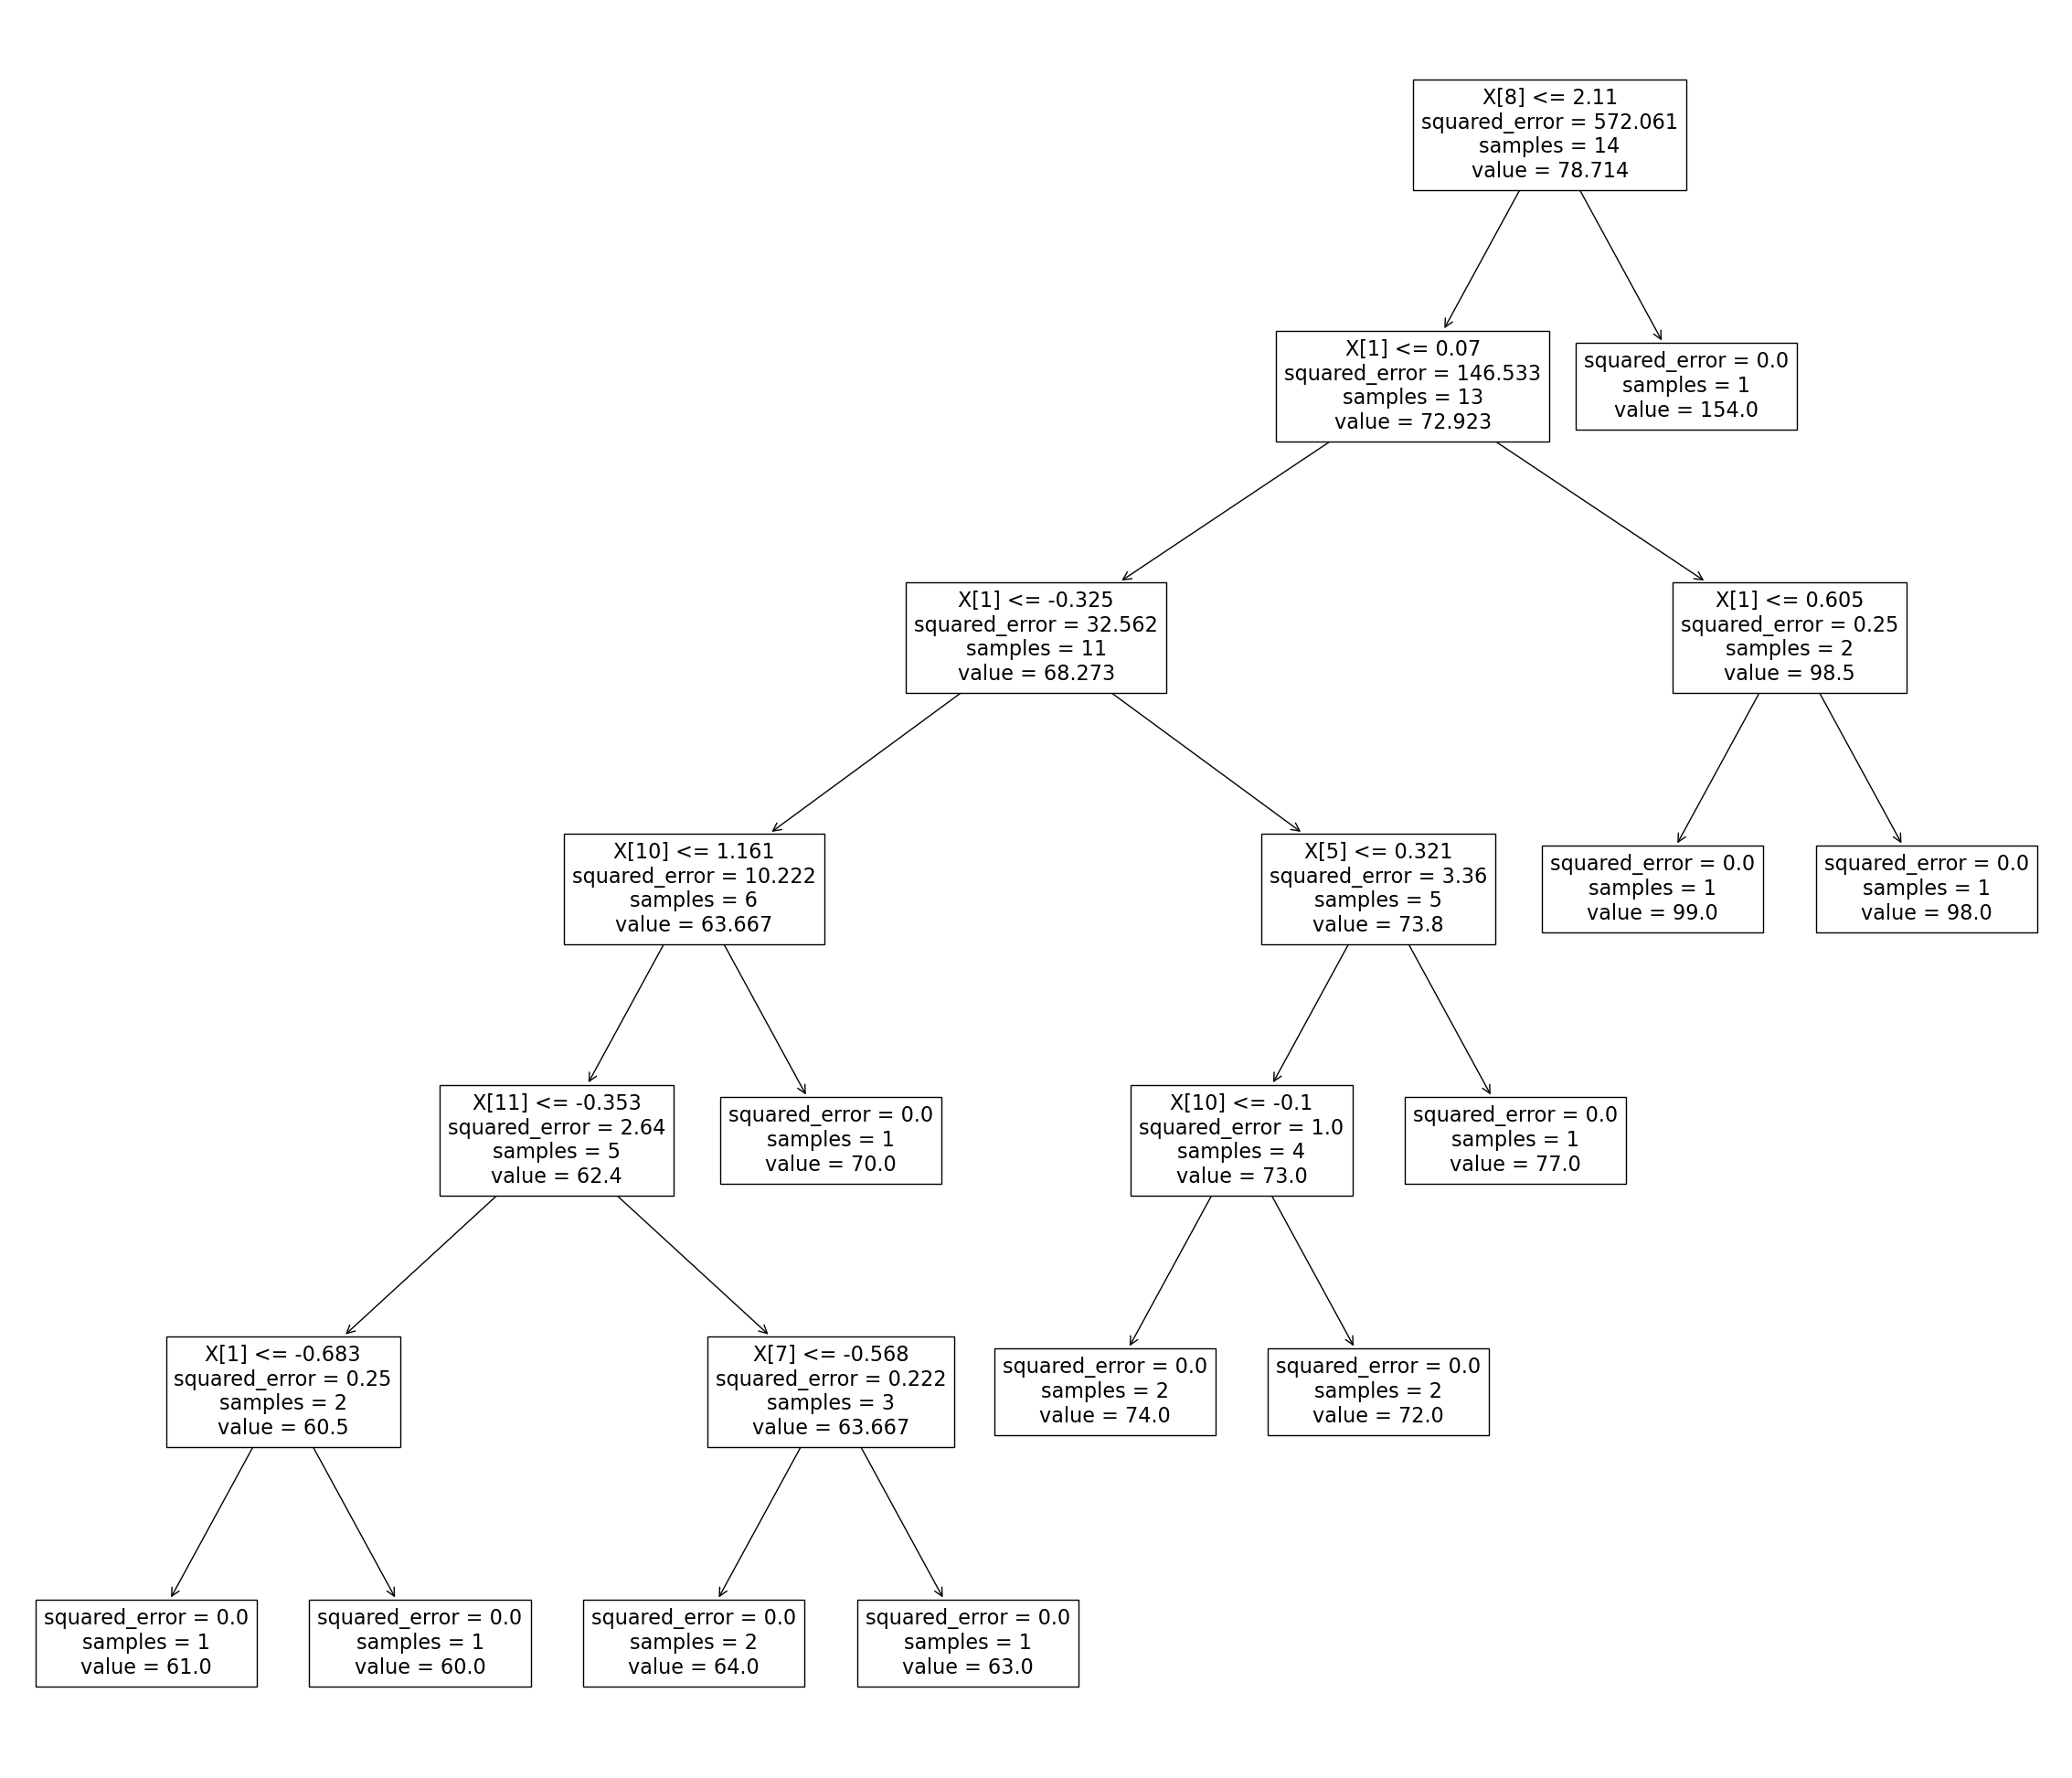

In [29]:
fig = plt.figure(figsize=(29,25))
tree.plot_tree(DTregressor)

## SVRegressor

In [30]:
from sklearn.svm import SVR
SVR = SVR(kernel = 'linear')
SVR.fit(X_train, y_train)

SVR(kernel='linear')

In [31]:
y_pred= SVR.predict(X_test)

In [32]:
SVR_metrics = evaluate_preds(y_test, y_pred)

r2: 0.96
MSE: 15.92
RMSE: 3.99
MSLE: 0.00
RMSLE: 0.06
MAE: 3.50


### RandomForestRegressor

In [33]:
from sklearn.ensemble import RandomForestRegressor
RFregressor = RandomForestRegressor(n_estimators=100,random_state=42)
RFregressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [34]:
y_pred= RFregressor.predict(X_test)

In [35]:
RF_metrics = evaluate_preds(y_test, y_pred)

r2: 0.68
MSE: 120.99
RMSE: 11.00
MSLE: 0.03
RMSLE: 0.17
MAE: 8.19


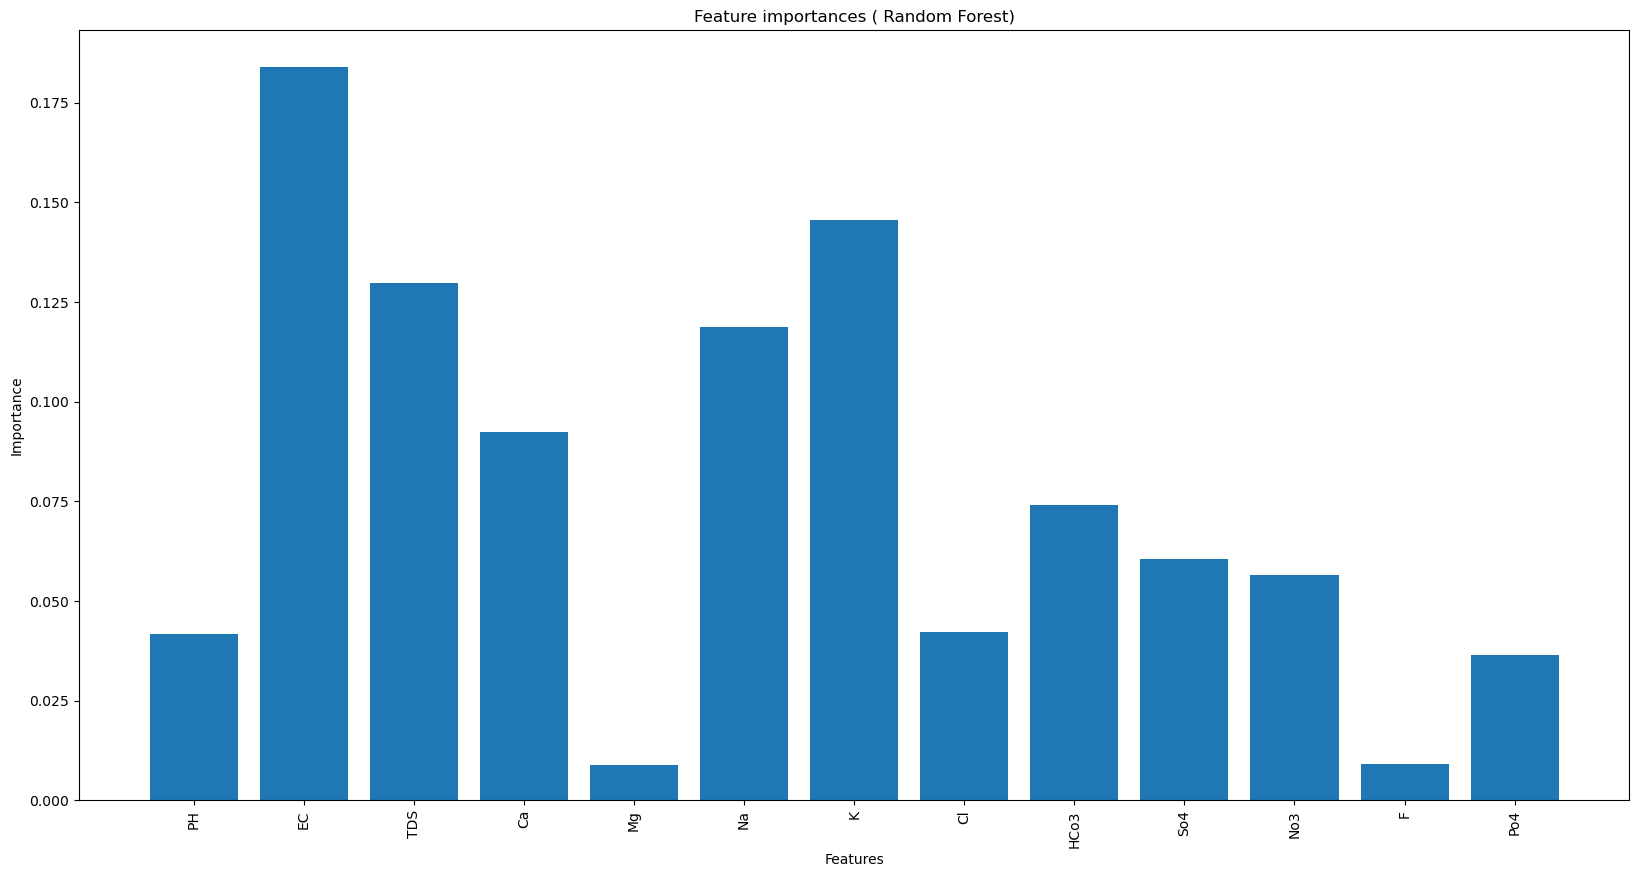

In [36]:
# features importances
plt.figure(figsize = (20,10))
plt.bar(X1.columns, RFregressor.feature_importances_)
plt.xticks(rotation = 90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature importances ( Random Forest)")
plt.show()

### Lasso

In [37]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
LassoR=Lasso(alpha=0.1)
LassoR.fit(X_train, y_train)
 


Lasso(alpha=0.1)

In [38]:
y_pred= LassoR.predict(X_test)

In [39]:
Lasso_metrics = evaluate_preds(y_test, y_pred)

r2: 1.00
MSE: 0.40
RMSE: 0.63
MSLE: 0.00
RMSLE: 0.01
MAE: 0.48


In [40]:
print(LassoR.coef_)
print(LassoR.intercept_)

[ 4.25e-01  4.15e+00  5.03e+00  0.00e+00 -0.00e+00  5.73e-04  1.15e+00
 -0.00e+00  1.25e+01  8.44e-01  1.24e+00  6.15e+00 -0.00e+00]
78.71428571428571


### Ridge

In [41]:
from sklearn.linear_model import Ridge
RidgeReg = Ridge(alpha=1.0)
RidgeReg.fit(X_train, y_train)

Ridge()

In [42]:
y_pred= RidgeReg.predict(X_test)

In [43]:
Ridge_metrics = evaluate_preds(y_test, y_pred)

r2: 0.98
MSE: 8.50
RMSE: 2.92
MSLE: 0.00
RMSLE: 0.05
MAE: 2.33


### XGboost Regressor

In [44]:
from xgboost import XGBRegressor
xbg_reg = XGBRegressor()
xbg_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [45]:
y_pred= xbg_reg.predict(X_test)

In [46]:
XGBoost_metrics = evaluate_preds(y_test, y_pred)

r2: 0.77
MSE: 85.23
RMSE: 9.23
MSLE: 0.02
RMSLE: 0.14
MAE: 6.88


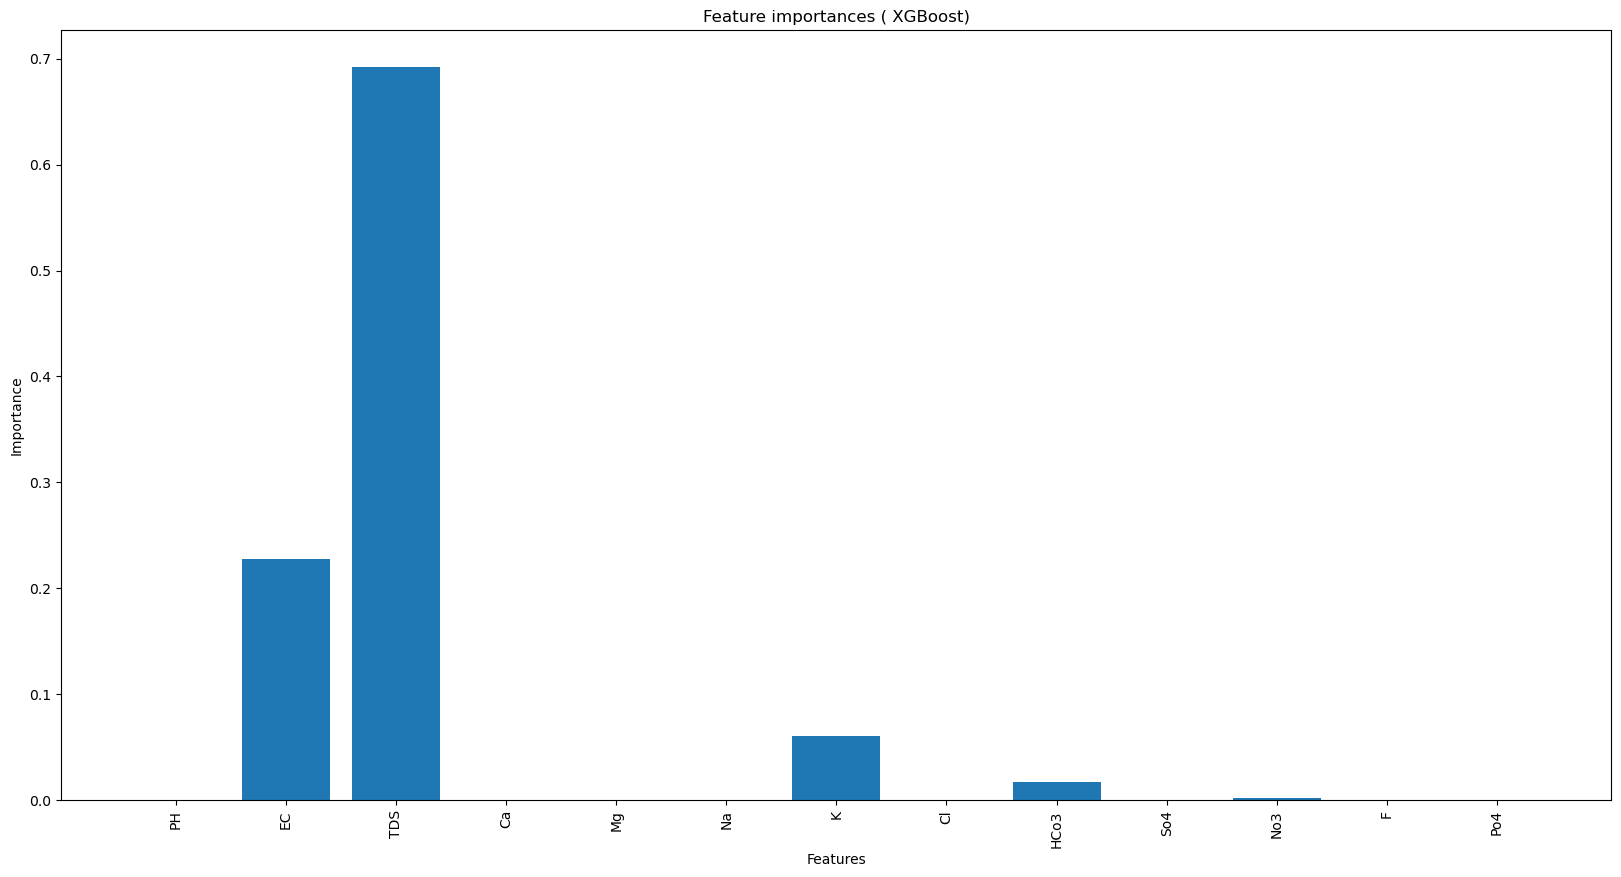

In [47]:
# features importances
plt.figure(figsize = (20,10))
plt.bar(X1.columns, xbg_reg.feature_importances_)
plt.xticks(rotation = 90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature importances ( XGBoost)")
plt.show()

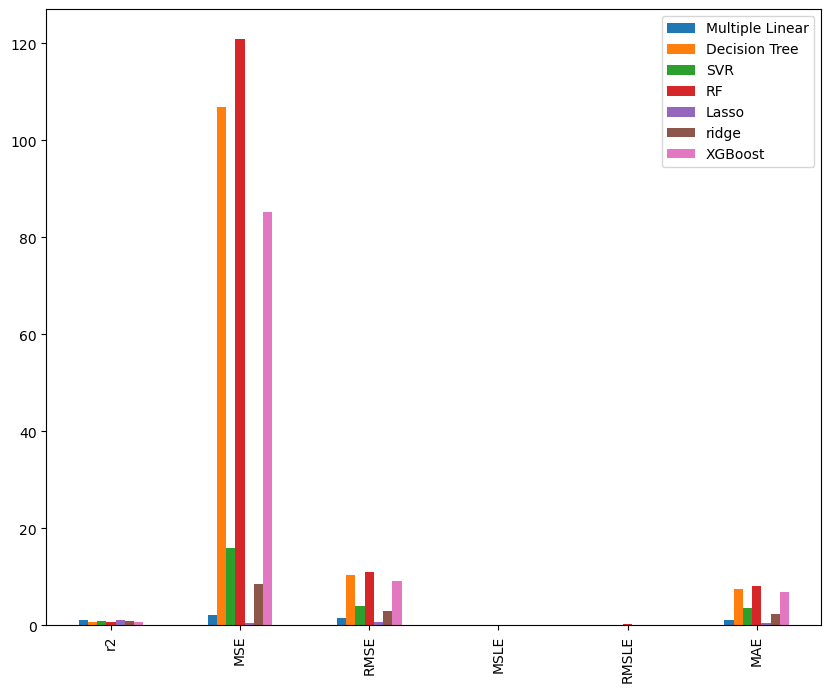

In [48]:
Regression_metrics = pd.DataFrame({"Multiple Linear": MultipleLinearR_metrics,
                                "Decision Tree": DT_metrics,
                                "SVR": SVR_metrics,
                                "RF": RF_metrics,
                                "Lasso": Lasso_metrics,
                                "ridge": Ridge_metrics,
                                "XGBoost": XGBoost_metrics
                               })

Regression_metrics.plot.bar(figsize=(10, 8));

In [49]:
metrics=Regression_metrics.T

In [50]:
metrics

,r2,MSE,RMSE,MSLE,RMSLE,MAE
Multiple Linear,0.99,2.11,1.45,0.00,0.02,0.99
Decision Tree,0.71,106.86,10.34,0.02,0.15,7.43
SVR,0.96,15.92,3.99,0.00,0.06,3.50
RF,0.68,120.99,11.00,0.03,0.17,8.19
Lasso,1.00,0.40,0.63,0.00,0.01,0.48
ridge,0.98,8.50,2.92,0.00,0.05,2.33
XGBoost,0.77,85.23,9.23,0.02,0.14,6.88


In [51]:
r2_compa= metrics.r2

In [52]:
r2_compa

Multiple Linear    0.99
Decision Tree      0.71
SVR                0.96
RF                 0.68
Lasso              1.00
ridge              0.98
XGBoost            0.77
Name: r2, dtype: float64

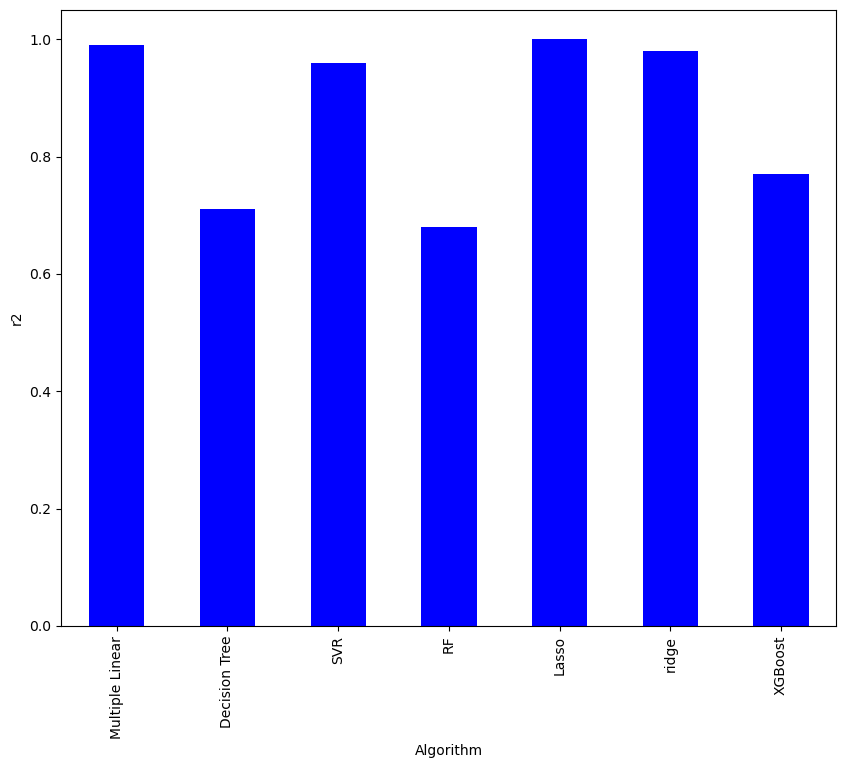

In [53]:
fig, ax = plt.subplots()
ax.set_xlabel('Algorithm')
ax.set_ylabel('r2')
r2_compa.plot.bar(figsize=(10, 8), color= 'blue');



### Clustering water quality samples

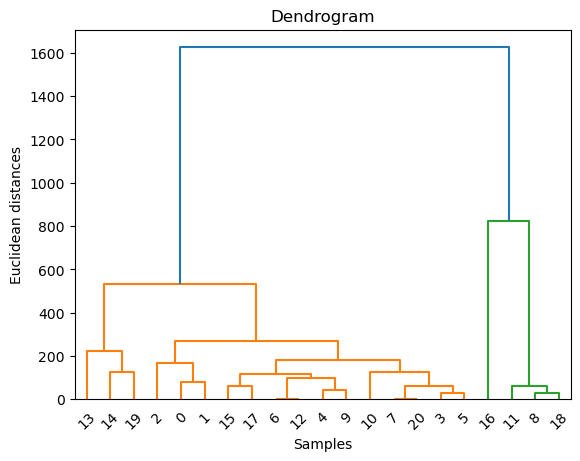

In [54]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(dataset, method='complete'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()